# Importowanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig
from numpy.linalg import matrix_power
from scipy.stats import norm
from numpy.linalg import inv

# Generowanie losowych punktów

In [2]:
random_x1 = norm.ppf(np.random.uniform(low=0, high=1, size=(500, 1)))
random_y1 = norm.ppf(np.random.uniform(low=0, high=1, size=(500, 1)))
random_x2 = norm.ppf(np.random.uniform(low=0, high=1, size=(500, 1)))
random_y2 = norm.ppf(np.random.uniform(low=0, high=1, size=(500, 1)))
random_x3 = norm.ppf(np.random.uniform(low=0, high=1, size=(500, 1)))
random_y3 = norm.ppf(np.random.uniform(low=0, high=1, size=(500, 1)))

# Wizualizacja losowych punktów

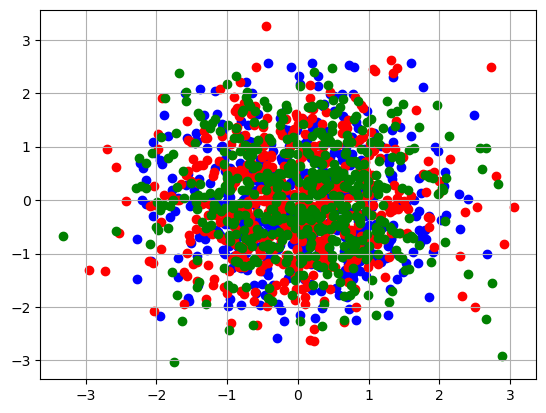

In [3]:
plt.scatter(random_x1, random_y1, color='blue')
plt.scatter(random_x2, random_y2, color='red')
plt.scatter(random_x3, random_y3, color='green')
plt.grid()
plt.show()

# Generowanie dwóch zbiorów o tej samej macierzy kowariancji

In [4]:
def inverse_whitening(K, A, y):
    sqrtA = A
    sqrtA[0][0] = math.sqrt(A[0][0])
    sqrtA[1][1] = math.sqrt(A[1][1])
    x = np.dot(np.dot(K, sqrtA), y)
    return x

In [5]:
y1 = np.array([random_x1, random_y1])
y2 = np.array([random_x2, random_y2])
y3 = np.array([random_x3, random_y3])
y1 = np.resize(y1,(2,500))
y2 = np.resize(y2, (2,500))
y3 = np.resize(y3, (2, 500))


In [6]:
first_matrix = np.array([[100, 7], [7, 1]])
second_matrix = np.array([[100, 7], [7, 1]])
third_matrix = np.array([[50, -5], [-5, 2]])
fourth_matrix = np.array([[100, 7], [7, 1]])

translation2 = np.array([-15, 1])
translation3 = np.array([3, -4])
translation4 = np.array([-30, -3])

lambdas1, K1 = eig(first_matrix)
A1 = np.diag(lambdas1)

lambdas2, K2 = eig(first_matrix)
A2 = np.diag(lambdas2)

lambdas3, K3 = eig(third_matrix)
A3 = np.diag(lambdas3)

lambdas4, K4 = eig(fourth_matrix)
A4 = np.diag(lambdas4)

x1 = inverse_whitening(K1, A1, y1).transpose()
x2 = inverse_whitening(K2, A2, y2).transpose()
for elem in x2:
    elem += translation2
x3 = inverse_whitening(K3, A3, y2).transpose()
for elem in x3:
    elem += translation3
x4 = inverse_whitening(K4, A4, y3).transpose()
for elem in x4:
    elem += translation4

# Wizualizacja chmur punktów o tej samej macierzy kowariancji

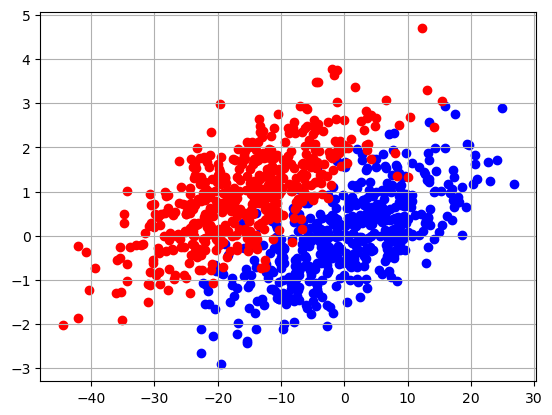

In [7]:
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x2[:, 0], x2[:, 1], color='red')
plt.grid()
plt.show()


# Wyznaczenie liniowych reguł decyzyjnych

In [8]:
p_1 = 0.5
p_2 = 0.5
m_1 = np.mean(x1, axis=0)
m_2 = np.mean(x2, axis=0)
m_1, m_2 

(array([0.33372961, 0.01407573]), array([-15.41680001,   0.94335759]))

In [9]:
def covariance_matrix(data, means):
    centered_data = data - means
    cov_matrix = np.dot(centered_data.T, centered_data) / (data.shape[0] - 1)
    return cov_matrix

S_1 = covariance_matrix(x1, m_1)
S_2 = covariance_matrix(x2, m_2)
S_p = (S_1 + S_2) / 2
S_1, S_2, S_p

(array([[91.47947214,  6.18965849],
        [ 6.18965849,  0.93374587]]),
 array([[97.24146413,  7.08779474],
        [ 7.08779474,  1.03055547]]),
 array([[94.36046814,  6.63872661],
        [ 6.63872661,  0.98215067]]))

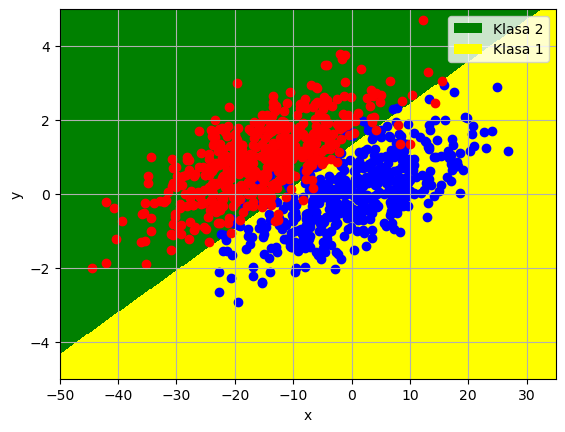

In [10]:
def multiply(a, b, c):
    return np.dot(a, np.dot(b, c))

x = np.linspace(-50, 35, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

points = np.column_stack((x.flatten(), y.flatten()))
z_1 = np.log(p_1) - 0.5 * multiply(m_1.T, inv(S_p), m_1) + multiply(m_1.T, inv(S_1), points.T)
z_2 = np.log(p_2) - 0.5 * multiply(m_2.T, inv(S_p), m_2) + multiply(m_2.T, inv(S_2), points.T)
z = np.where(z_1 > z_2, 1, 0)
z = z.reshape(x.shape)

plt.contourf(x, y, z, levels=[-1, 0.5, 2], colors=['green', 'yellow'])
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x2[:, 0], x2[:, 1], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
legend_labels = {0: 'Klasa 2', 1: 'Klasa 1'}
legend_handles = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in ['green', 'yellow']]
plt.legend(legend_handles, legend_labels.values(), loc='upper right')
plt.show()

# Wizualizacja chmury punktów o różnej macierzy kowariancji

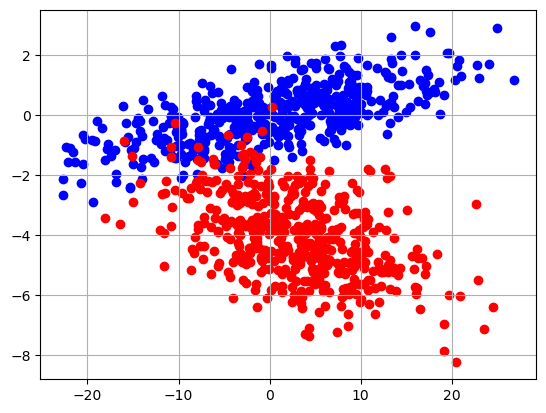

In [11]:
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x3[:, 0], x3[:, 1], color='red')
plt.grid()
plt.show()

# Wyznaczenie kwadratowych reguł decyzyjnych

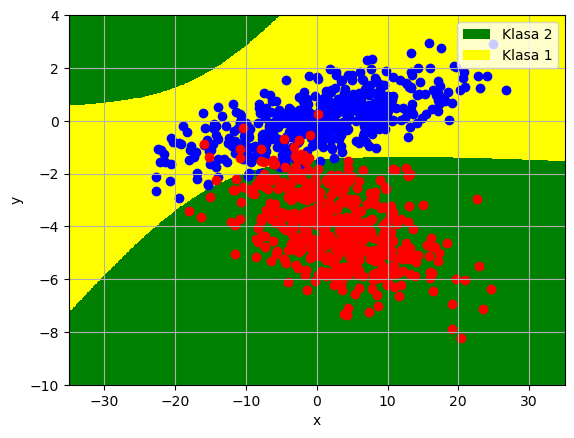

In [12]:
m_1 = np.mean(x1, axis=0)
m_2 = np.mean(x3, axis=0)
S_1 = covariance_matrix(x1, m_1)
S_2 = covariance_matrix(x3, m_2)
S_p = (S_1 + S_2) / 2

x = np.linspace(-35, 35, 400)
y = np.linspace(-10, 4, 400)
x, y = np.meshgrid(x, y)

points = np.column_stack((x.flatten(), y.flatten()))
z_1 = np.log(p_1) - 0.5 * np.log(np.linalg.det(S_1)) - 0.5 * np.sum(np.dot((points - m_1), np.linalg.inv(S_1)) * (points - m_1), axis=1)
z_2 = np.log(p_2) - 0.5 * np.log(np.linalg.det(S_2)) - 0.5 * np.sum(np.dot((points - m_2), np.linalg.inv(S_2)) * (points - m_2), axis=1)
z = np.where(z_1 > z_2, 1, 0)
z = z.reshape(x.shape)

plt.contourf(x, y, z, levels=[-1, 0.5, 2], colors=['green', 'yellow'])
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x3[:, 0], x3[:, 1], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
legend_labels = {0: 'Klasa 2', 1: 'Klasa 1'}
legend_handles = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in ['green', 'yellow']]
plt.legend(legend_handles, legend_labels.values(), loc='upper right')
plt.show()

# Wizualizacja wielu chmur punktów o tej samej macierzy kowariancji

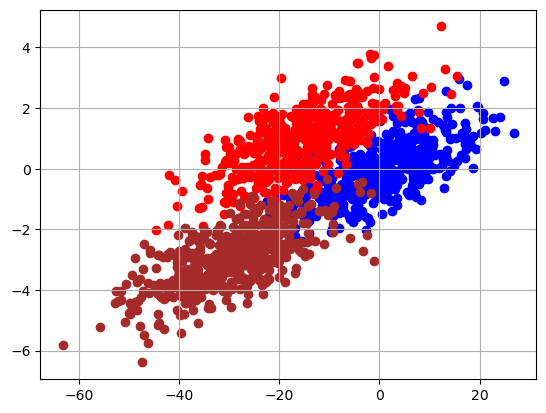

In [16]:
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x2[:, 0], x2[:, 1], color='red')
plt.scatter(x4[:, 0], x4[:, 1], color='brown')
plt.grid()
plt.show()

# Porównanie parami liniowych reguł decyzyjnych

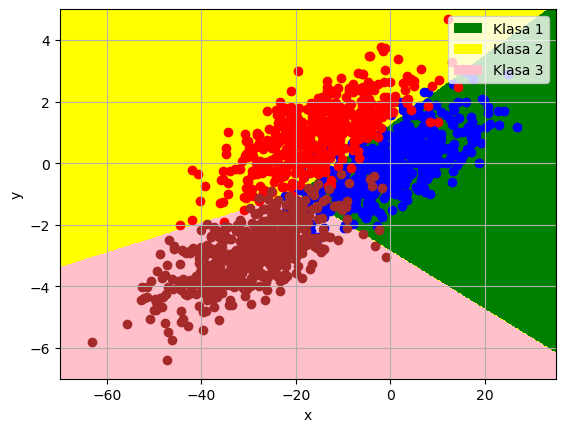

In [15]:
p_1 = 1/3
p_2 = 1/3
p_4 = 1/3
m_1 = np.mean(x1, axis=0)
m_2 = np.mean(x2, axis=0)
m_4 = np.mean(x4, axis=0)

S_1 = covariance_matrix(x1, m_1)
S_2 = covariance_matrix(x2, m_2)
S_4 = covariance_matrix(x4, m_4)

S_p = (S_1 + S_2 + S_4) / 3

x = np.linspace(-70, 35, 400)
y = np.linspace(-7, 5, 400)
x, y = np.meshgrid(x, y)

points = np.column_stack((x.flatten(), y.flatten()))
z_1 = np.log(p_1) - 0.5 * multiply(m_1.T, np.linalg.inv(S_p), m_1) + multiply(m_1.T, np.linalg.inv(S_1), points.T)
z_2 = np.log(p_2) - 0.5 * multiply(m_2.T, np.linalg.inv(S_p), m_2) + multiply(m_2.T, np.linalg.inv(S_2), points.T)
z_4 = np.log(p_4) - 0.5 * multiply(m_4.T, np.linalg.inv(S_p), m_4) + multiply(m_4.T, np.linalg.inv(S_4), points.T)

z = np.where(np.logical_and(z_1 > z_2, z_1 > z_4), 0, np.where(z_2 > z_4, 1, 2))
z = z.reshape(x.shape)

plt.contourf(x, y, z, levels=[-1, 0.5, 1.5, 2], colors=['green', 'yellow', 'pink'])
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x2[:, 0], x2[:, 1], color='red')
plt.scatter(x4[:, 0], x4[:, 1], color='brown')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
legend_labels = {0: 'Klasa 1', 1: 'Klasa 2', 2: 'Klasa 3'}
legend_handles = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in ['green', 'yellow', 'pink']]
plt.legend(legend_handles, legend_labels.values(), loc='upper right')
plt.show()